# 导入需要的包

In [1]:
import h5py
import pandas as pd
import seaborn as sns
import os
import fnmatch
import matplotlib.pyplot as plt
import numpy as np

# 读取数据

In [2]:
# GW200224_222234
file_name = 'IGWN-GWTC3p0-v2-GW200224_222234_PEDataRelease_mixed_nocosmo.h5'

In [3]:
with h5py.File(file_name, 'r') as f:
    print(f)
    print(f.keys())
    print('\r')

    print(f['C01:IMRPhenomXPHM'])
    print(f['C01:IMRPhenomXPHM'].keys())
    print('\r')

    print(f['C01:IMRPhenomXPHM']['priors'])
    print(f['C01:IMRPhenomXPHM']['priors'].keys())
    print('\r')

    print(f['C01:IMRPhenomXPHM']['priors']['samples'])
    print(f['C01:IMRPhenomXPHM']['priors']['samples'].keys())
    print('\r')

    print(f['C01:IMRPhenomXPHM']['priors']['samples']['a_1'])
    print('\r')

    priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM']['priors']['samples']))
    # print(priors)
    # print('\r')

    print(f['C01:Mixed'])
    print(f['C01:Mixed'].keys())
    print('\r')

    print(f['C01:Mixed']['posterior_samples'])
    print(f['C01:Mixed']['posterior_samples'].dtype)

    posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    # print(posterior_samples)

<HDF5 file "IGWN-GWTC3p0-v2-GW200224_222234_PEDataRelease_mixed_nocosmo.h5" (mode r)>
<KeysViewHDF5 ['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']>

<HDF5 group "/C01:IMRPhenomXPHM" (11 members)>
<KeysViewHDF5 ['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'skymap', 'version']>

<HDF5 group "/C01:IMRPhenomXPHM/priors" (3 members)>
<KeysViewHDF5 ['analytic', 'calibration', 'samples']>

<HDF5 group "/C01:IMRPhenomXPHM/priors/samples" (141 members)>
<KeysViewHDF5 ['a_1', 'a_2', 'azimuth', 'beta', 'chi_eff', 'chi_p', 'chi_p_2spin', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_iota', 'cos_theta_jn', 'cos_tilt_1', 'cos_tilt_2', 'final_mass_non_evolved', 'final_mass_source_non_evolved', 'final_spin_non_evolved', 'geocent_time', 'inverted_mass_ratio', 'iota', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'peak_lum

In [4]:
priors

,a_1,a_2,azimuth,beta,chi_eff,chi_p,chi_p_2spin,chirp_mass,chirp_mass_source,comoving_distance,...,spin_2z,symmetric_mass_ratio,theta_jn,tilt_1,tilt_2,time_jitter,total_mass,total_mass_source,viewing_angle,zenith
0,0.460128,0.444882,2.145117,0.484597,-0.017186,0.454140,0.464483,44.889978,21.884712,3521.420488,...,0.184631,0.171393,0.929696,1.732292,1.142840,-0.000809,129.346110,63.058671,0.929696,1.561957
1,0.762177,0.548389,1.164424,0.411250,-0.024444,0.713720,0.733618,44.930641,20.028612,3960.727207,...,0.409501,0.230105,1.025151,1.929299,0.727658,0.000854,108.489419,48.361039,1.025151,2.240795
2,0.866523,0.216486,2.240282,0.351323,0.025298,0.866394,0.855379,44.157503,20.270804,3817.563846,...,0.040096,0.242119,2.381255,1.553527,1.384508,-0.000362,103.415943,47.473797,0.760338,1.618132
3,0.922355,0.158073,5.371943,0.940030,0.397972,0.821131,0.821225,50.214304,21.312379,4197.393685,...,0.039362,0.054737,1.485624,1.097904,1.319135,0.000021,286.984862,121.804539,1.485624,0.802571
4,0.100252,0.662175,5.333537,0.063933,0.138574,0.087998,0.057907,35.246097,24.352617,1765.691667,...,0.487807,0.153953,1.383336,0.970762,0.742657,-0.000853,108.312447,74.836416,1.383336,0.980989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.005754,0.210397,2.488447,0.002178,-0.039614,0.013361,0.002017,37.985376,16.796509,3999.882871,...,-0.201707,0.165169,2.456345,0.991916,2.853185,0.000850,111.907562,49.483684,0.685248,2.144893
4996,0.290018,0.607881,6.181244,0.053072,-0.335417,0.184990,0.226340,43.468744,23.129754,3084.738476,...,-0.450160,0.221976,2.896619,2.855564,2.404669,-0.000893,107.249100,57.067334,0.244974,2.294582
4997,0.801405,0.433937,4.780141,2.499473,-0.654727,0.385905,0.385251,53.621190,30.269935,2786.823849,...,0.086298,0.056764,1.953092,2.639187,1.370590,0.000836,299.843686,169.266086,1.188501,1.516813
4998,0.727182,0.083204,4.021904,0.672532,0.071691,0.721125,0.715606,34.119482,14.921696,4053.216928,...,-0.026140,0.149733,1.318053,1.441644,1.890376,0.000890,106.613605,46.626024,1.318053,0.720917


In [5]:
posterior_samples

,final_spin,spin_2y,final_mass_source,spin_1y,cos_tilt_2,mass_1_source,viewing_angle,spin_2x,inverted_mass_ratio,phi_2,...,mass_1,tilt_1_infinity_only_prec_avg,tilt_2_infinity_only_prec_avg,spin_1z_infinity_only_prec_avg,spin_2z_infinity_only_prec_avg,chi_eff_infinity_only_prec_avg,chi_p_infinity_only_prec_avg,cos_tilt_1_infinity_only_prec_avg,cos_tilt_2_infinity_only_prec_avg,psi_wrapped
0,0.762918,-0.041085,69.109977,0.014177,0.058832,40.733833,1.060127,-0.692939,1.269768,3.200814,...,52.771531,0.305515,1.930207,0.412034,-0.244574,0.122750,0.495520,0.953692,-0.351722,3.028532
1,0.733357,0.023274,65.985930,0.356863,-0.395370,37.751510,0.342163,-0.836304,1.196297,3.113770,...,50.609139,0.739061,2.164322,0.371285,-0.509422,-0.029711,0.615253,0.739102,-0.559287,2.573610
2,0.739718,-0.093947,69.038893,0.409447,0.626205,38.959810,0.711928,-0.238127,1.149041,3.517372,...,51.059068,1.233780,1.027831,0.145961,0.169643,0.156981,0.416576,0.330673,0.516677,0.551321
3,0.765359,0.298139,66.657875,0.324863,-0.806156,36.032509,0.583759,0.229303,1.048945,0.915173,...,49.267700,1.168438,1.730158,0.356747,-0.100871,0.133404,0.838270,0.391589,-0.158688,0.503517
4,0.753689,0.321498,65.900583,0.478889,-0.209761,38.926599,0.628362,0.102761,1.276905,1.261429,...,52.668939,0.647877,2.631644,0.440828,-0.301281,0.114899,0.333645,0.797367,-0.872769,0.641404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27061,0.710674,-0.475069,70.147694,0.027305,0.492853,40.590815,1.301857,-0.616686,1.221792,3.797996,...,49.241150,2.894953,1.008618,-0.201377,0.476881,0.103898,0.602133,-0.969738,0.533030,0.555911
27062,0.743191,-0.023688,71.574457,0.118548,-0.635140,40.205130,0.689038,0.000449,1.135471,4.731327,...,54.041218,0.601180,1.483540,0.322413,0.002673,0.172685,0.221133,0.824669,0.087145,2.572079
27063,0.739334,0.223585,67.728669,-0.457237,0.046939,37.197791,0.462727,-0.697700,1.085143,2.831472,...,51.413841,1.762402,0.924451,-0.120372,0.441742,0.149209,0.620521,-0.190435,0.602273,2.546528
27064,0.742815,0.011281,67.972470,-0.508132,0.473092,40.622630,0.154172,0.105046,1.310636,0.106980,...,55.849770,1.184608,1.317296,0.215833,0.030075,0.135441,0.530817,0.376660,0.250794,2.624960


# 画一个练练手

整理数据

In [6]:
data_posterior = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data_posterior.chirp_mass_source = posterior_samples.chirp_mass_source
data_posterior.violin = 'upper'
data_posterior.event = 'GW200224_222234'

data_prior = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data_prior.chirp_mass_source = priors.chirp_mass_source
data_prior.violin = 'bottom'
data_prior.event = 'GW200224_222234'

data = pd.concat([data_posterior, data_prior])
data

,event,violin,chirp_mass_source
0,GW200224_222234,upper,31.424565
1,GW200224_222234,upper,30.023442
2,GW200224_222234,upper,31.625226
3,GW200224_222234,upper,30.625790
4,GW200224_222234,upper,29.944292
...,...,...,...
4995,GW200224_222234,bottom,16.796509
4996,GW200224_222234,bottom,23.129754
4997,GW200224_222234,bottom,30.269935
4998,GW200224_222234,bottom,14.921696


画图

<Axes: xlabel='chirp_mass_source', ylabel='event'>

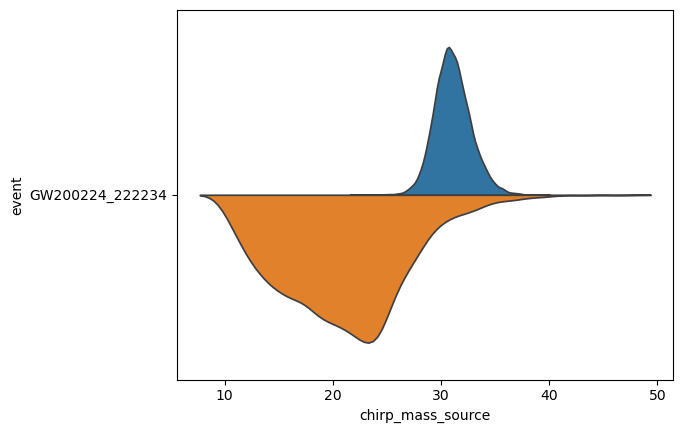

In [7]:
sns.violinplot(x='chirp_mass_source', y='event', data=data,
               hue='violin', split=True, inner=None, legend=False
              )

# 集中在一起

整理数据

In [8]:
address = './'
event_list = [(file.split('_PEDataRelease')[0].split('-')[3], file) 
              for file in os.listdir(address)
              if fnmatch.fnmatch(file, '*_cosmo.h5')]

data_list = []

for event in event_list:
    with h5py.File(event[1], 'r') as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM' if event[0] not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    
    data_posterior = pd.DataFrame({
        'event' : event[0],
        'violin' : 'upper',
        'chirp_mass_source' : posterior_samples.chirp_mass_source
    })
    data_list.append(data_posterior)
    data_prior = pd.DataFrame({
        'event' : event[0], 
        'violin' : 'bottom', 
        'chirp_mass_source': priors.chirp_mass_source
    })
    data_list.append(data_prior)

data_list = pd.concat(data_list)
data_list

,event,violin,chirp_mass_source
0,GW191103_012549,upper,8.929873
1,GW191103_012549,upper,8.074338
2,GW191103_012549,upper,8.273513
3,GW191103_012549,upper,8.369736
4,GW191103_012549,upper,8.441250
...,...,...,...
4995,GW200322_091133,bottom,38.664199
4996,GW200322_091133,bottom,36.743287
4997,GW200322_091133,bottom,6.229935
4998,GW200322_091133,bottom,29.972274


画图

<Axes: xlabel='chirp_mass_source', ylabel='event'>

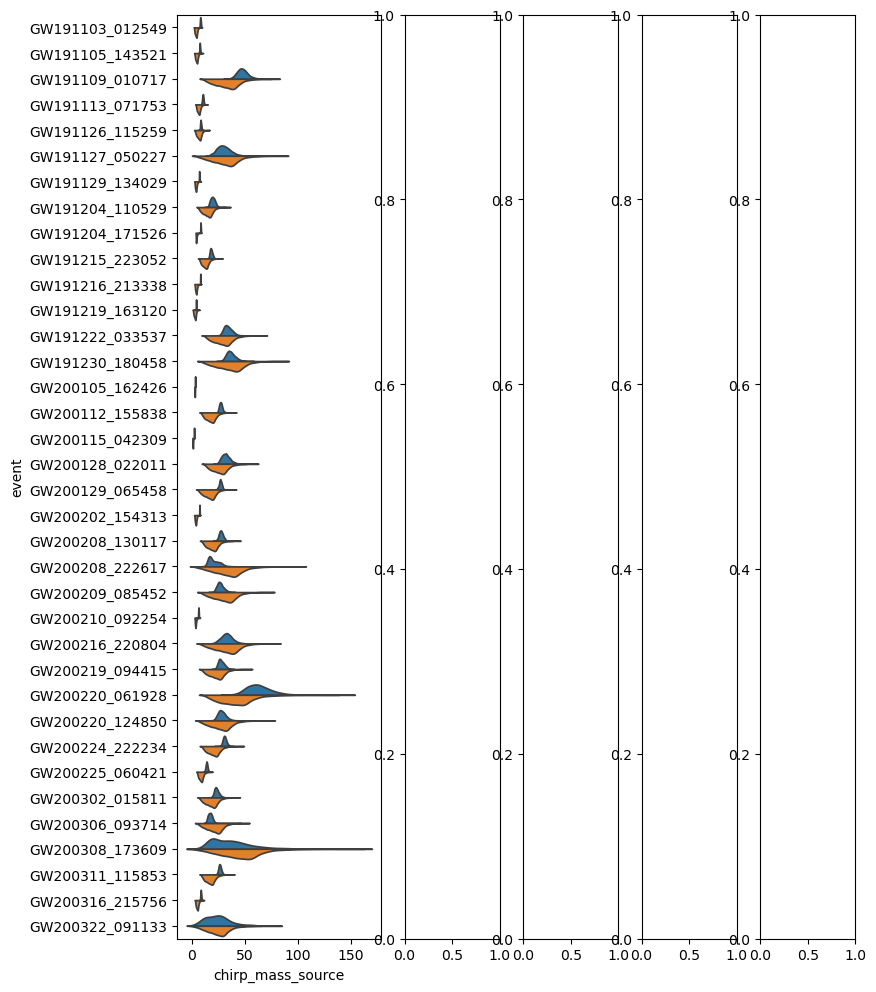

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(8.75, 12), width_ratios=[1.5, 0.7, 0.7, 0.7, 0.7])

sns.violinplot(x='chirp_mass_source', y='event', data=data_list,
               hue='violin', split=True, inner=None, legend=False,
               ax=ax[0], density_norm='width'
              )

修正：对数据取对数，修改坐标刻度，修改坐标取值范围，去除y轴标签event，添加x轴标签，开启上方刻度，开启上方名称，关闭左侧刻度

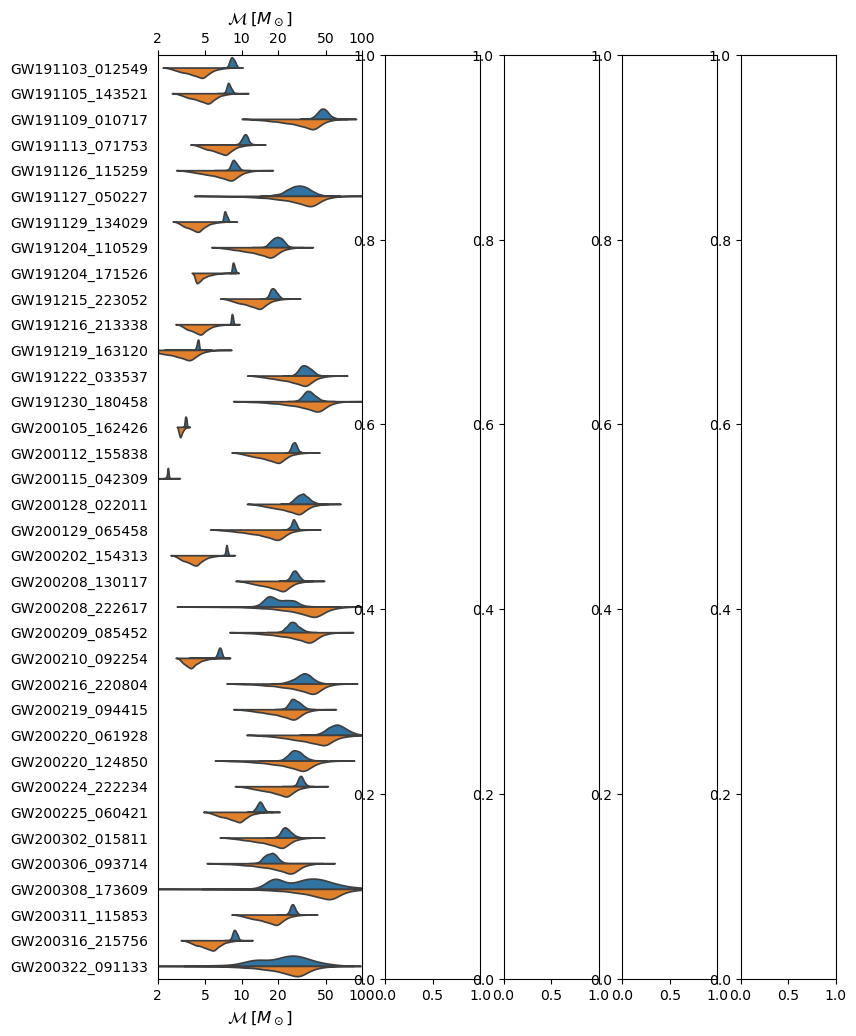

In [10]:
address = './'
event_list = [(file.split('_PEDataRelease')[0].split('-')[3], file) 
              for file in os.listdir(address)
              if fnmatch.fnmatch(file, '*_cosmo.h5')]

data_list = []

for event in event_list:
    with h5py.File(event[1], 'r') as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM' if event[0] not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    
    data_posterior = pd.DataFrame({
        'event' : event[0],
        'violin' : 'upper',
        'chirp_mass_source' : np.log10(posterior_samples.chirp_mass_source)
    })
    data_list.append(data_posterior)
    data_prior = pd.DataFrame({
        'event' : event[0], 
        'violin' : 'bottom', 
        'chirp_mass_source': np.log10(priors.chirp_mass_source)
    })
    data_list.append(data_prior)

data_list = pd.concat(data_list)

fig, ax = plt.subplots(1, 5, figsize=(8.75, 12), width_ratios=[1.5, 0.7, 0.7, 0.7, 0.7])

sns.violinplot(x='chirp_mass_source', y='event', data=data_list,
               hue='violin', split=True, inner=None, legend=False,
               ax=ax[0], density_norm='width'
              )
ax[0].set_xlim(np.log10(2), np.log10(100))
ax[0].set_xticks(np.log10([2,5,10,20,50,100]), [2,5,10,20,50,100])
ax[0].set_ylabel('')
ax[0].set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$', fontsize=12)
ax[0].tick_params(top=True, labeltop=True, left=False)
ax[0].set_title(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$', fontsize=12)
plt.show()

# 把其他参数也加进来

整理数据

In [2]:
address = './'
event_list = [(file.split('_PEDataRelease')[0].split('-')[3], file) 
              for file in os.listdir(address)
              if fnmatch.fnmatch(file, '*_cosmo.h5')]

data_list = []

vars = ['chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p', 'luminosity_distance']

for event in event_list:
    with h5py.File(event[1], 'r') as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM' if event[0] not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    
    data_posterior = pd.DataFrame({
        'event' : event[0],
        'violin' : 'upper',
        vars[0] : np.log10(posterior_samples[vars[0]]),
        vars[1] : np.log10(posterior_samples[vars[1]]),
        vars[2] : posterior_samples[vars[2]],
        vars[3] : posterior_samples[vars[3]],
        vars[4] : np.log10(posterior_samples[vars[4]]/1000)
    })
    data_list.append(data_posterior)
    data_prior = pd.DataFrame({
        'event' : event[0], 
        'violin' : 'bottom', 
        vars[0] : np.log10(priors[vars[0]]),
        vars[1] : np.log10(priors[vars[1]]),
        vars[2] : priors[vars[2]],
        vars[3] : priors[vars[3]],
        vars[4] : np.log10(priors[vars[4]]/1000)
    })
    data_list.append(data_prior)

data_list = pd.concat(data_list)
data_list

,event,violin,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance
0,GW191103_012549,upper,0.950845,-0.013426,0.124681,0.398897,-0.288171
1,GW191103_012549,upper,0.907107,-0.028997,0.210005,0.232888,0.091748
2,GW191103_012549,upper,0.917690,-0.082065,0.191831,0.381942,0.032501
3,GW191103_012549,upper,0.922712,-0.353322,0.285288,0.516188,0.004128
4,GW191103_012549,upper,0.926407,-0.233709,0.228022,0.338341,-0.055944
...,...,...,...,...,...,...,...
4995,GW200322_091133,bottom,1.587309,-0.978478,0.808248,0.074668,1.194721
4996,GW200322_091133,bottom,1.565178,-0.550964,0.195930,0.293281,1.211398
4997,GW200322_091133,bottom,0.794484,-0.258141,0.201115,0.305499,1.227825
4998,GW200322_091133,bottom,1.476720,-0.808768,-0.019374,0.188534,1.387833


画图

Text(0.5, 1.0, '$D_{\\rm L}\\:[{\\rm Gpc}]$')

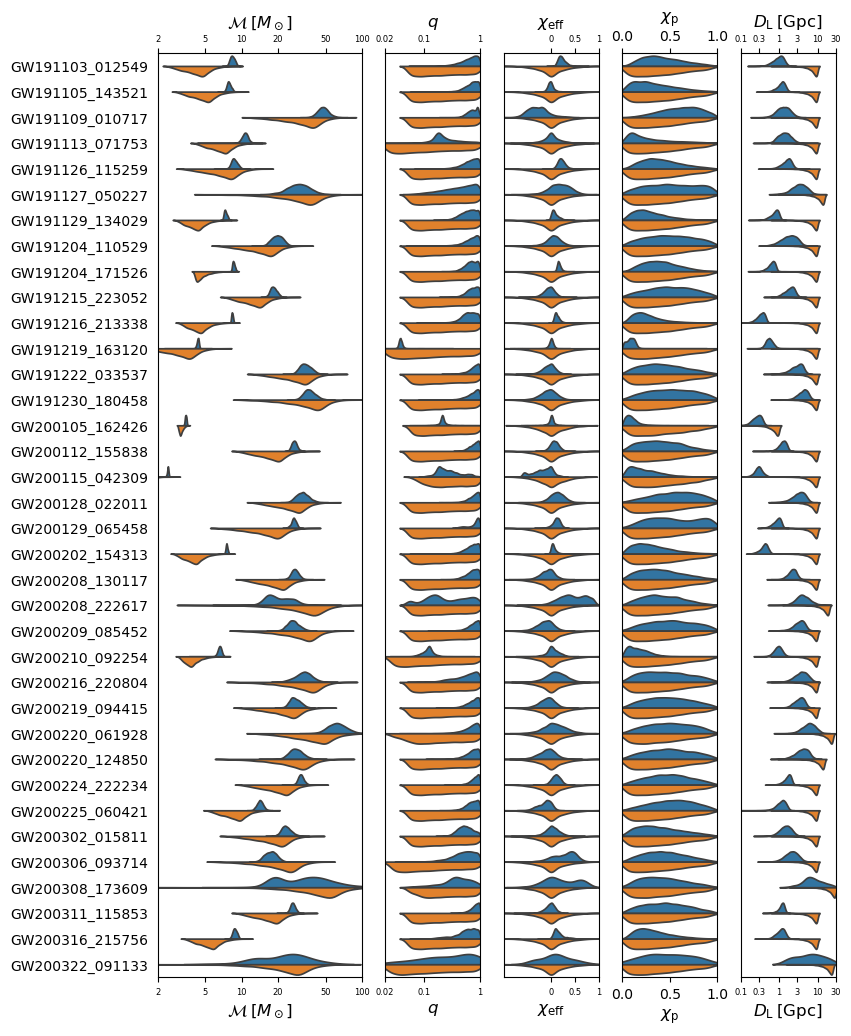

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(8.75, 12), width_ratios=[1.5, 0.7, 0.7, 0.7, 0.7])

for var in vars:
    sns.violinplot(x=var, y='event', data=data_list,
                hue='violin', split=True, inner=None, legend=False,
                ax=ax[vars.index(var)], density_norm='width'
                )
    if vars.index(var) != 0:
        ax[vars.index(var)].set_ylabel('')
        ax[vars.index(var)].tick_params(top=True, labeltop=True, left=False, labelleft=False)

ax[0].set_xlim(np.log10(2), np.log10(100))
ax[0].set_xticks(np.log10([2,5,10,20,50,100]), [2,5,10,20,50,100], fontsize=6)
ax[0].set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$', fontsize=12)
ax[0].set_title(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$', fontsize=12)
ax[0].set_ylabel('')
ax[0].tick_params(top=True, labeltop=True, left=False)

ax[1].set_xlim(np.log10(0.02), np.log10(1))
ax[1].set_xticks(np.log10([0.02, 0.1, 1]), [0.02, 0.1, 1], fontsize=6)
ax[1].set_xlabel(r'$'+r'q'+r'$', fontsize=12)
ax[1].set_title(r'$'+r'q'+r'$', fontsize=12)

ax[2].set_xlim(-1, 1)
ax[2].set_xticks([-1, 0, 1], [-1, 0, 1], fontsize=6)
ax[2].set_xlabel(r'$'+r'\chi_{{\rm eff}}'+r'$', fontsize=12)
ax[2].set_title(r'$'+r'\chi_{{\rm eff}}'+r'$', fontsize=12)

ax[3].set_xlim(0, 1)
ax[2].set_xticks([0, 0.5, 1], [0, 0.5, 1], fontsize=6)
ax[3].set_xlabel(r'$'+r'\chi_{{\rm p}}'+r'$', fontsize=12)
ax[3].set_title(r'$'+r'\chi_{{\rm p}}'+r'$', fontsize=12)

ax[4].set_xlim(np.log10(0.1), np.log10(30))
ax[4].set_xticks(np.log10([0.1,0.3,1,3,10,30]), [0.1,0.3,1,3,10,30], fontsize=6)
ax[4].set_xlabel(r'$'+r'D_{\rm L}\:[{\rm Gpc}]'+r'$', fontsize=12)
ax[4].set_title(r'$'+r'D_{\rm L}\:[{\rm Gpc}]'+r'$', fontsize=12)


封装

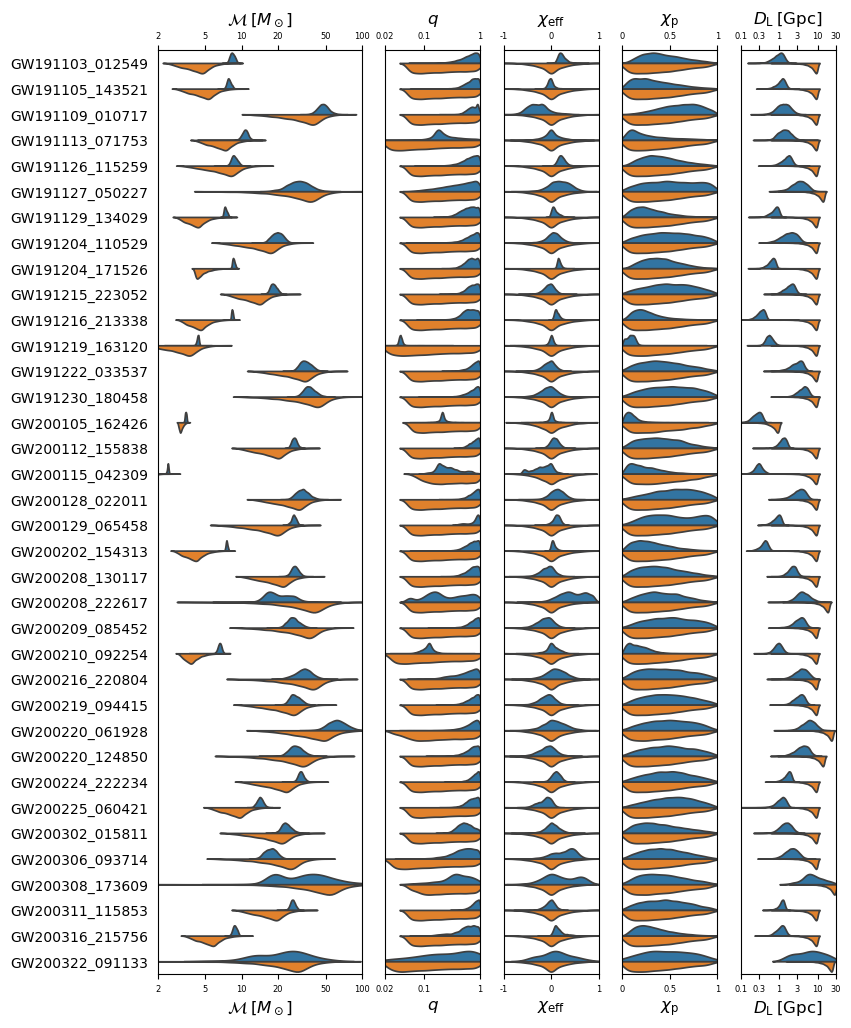

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(8.75, 12), width_ratios=[1.5, 0.7, 0.7, 0.7, 0.7])

for var in vars:
    sns.violinplot(x=var, y='event', data=data_list,
                hue='violin', split=True, inner=None, legend=False,
                ax=ax[vars.index(var)], density_norm='width'
                )
    ax[0].set_ylabel('')
    ax[0].tick_params(top=True, labeltop=True, left=False)
    if vars.index(var) != 0:
        ax[vars.index(var)].set_ylabel('')
        ax[vars.index(var)].tick_params(top=True, labeltop=True, left=False, labelleft=False)

lim_list = [[np.log10(2), np.log10(100)],
            [np.log10(0.02), np.log10(1)],
            [-1, 1],
            [0, 1],
            [np.log10(0.1), np.log10(30)]]
tick_list = [[2,5,10,20,50,100],
             [0.02, 0.1, 1],
             [-1, 0, 1],
             [0, 0.5, 1],
             [0.1,0.3,1,3,10,30]]
label_list = [r'\mathcal{{M}}\:[M_\odot]',
              r'q',
              r'\chi_{{\rm eff}}',
              r'\chi_{{\rm p}}',
              r'D_{\rm L}\:[{\rm Gpc}]']

for i in range(5):
    ax[i].set_xlim(lim_list[i][0], lim_list[i][1])
    ax[i].set_xlabel(r'$'+label_list[i]+r'$', fontsize=12)
    ax[i].set_title(r'$'+label_list[i]+r'$', fontsize=12)
    if i in (0, 1, 4):
        ax[i].set_xticks(np.log10(tick_list[i]), tick_list[i], fontsize=6)
    else:
        ax[i].set_xticks(tick_list[i], tick_list[i], fontsize=6)

# 修改一下风格

CPU times: total: 7.31 s
Wall time: 18.9 s


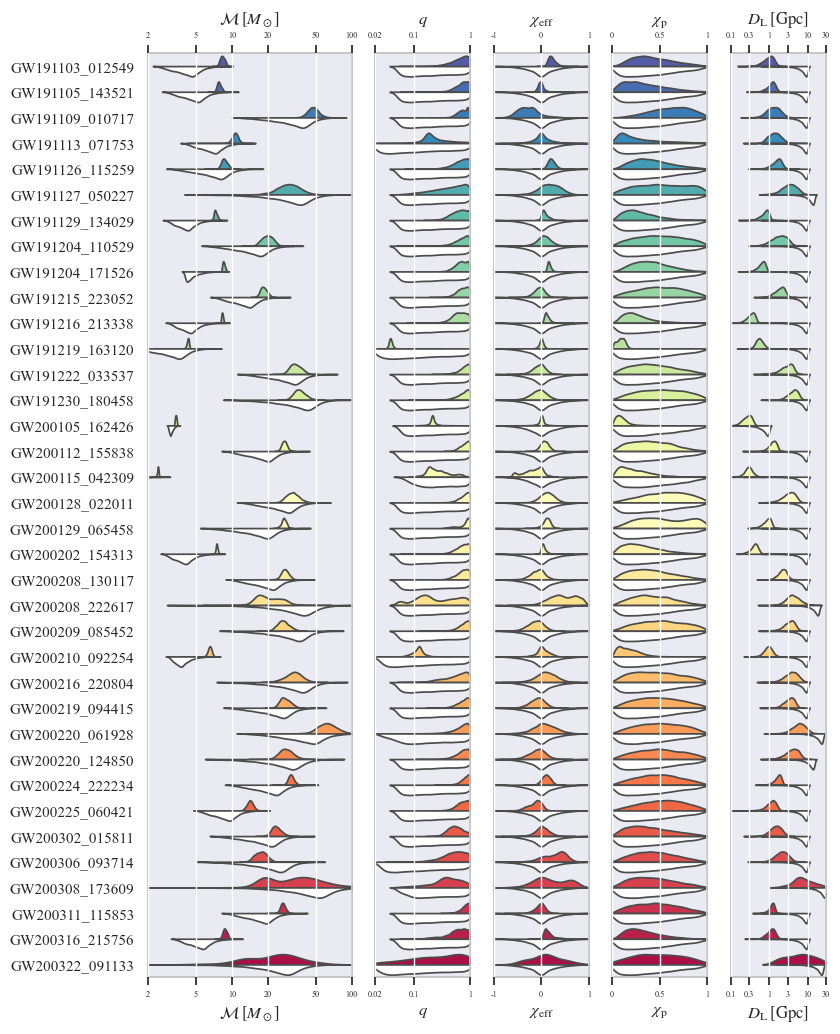

In [3]:
%%time
sns.set()

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'stix'

fig, ax = plt.subplots(1, 5, figsize=(8.75, 12), width_ratios=[1.5, 0.7, 0.7, 0.7, 0.7])

color_list = []
for i in range(len(event_list)):
    color_list.append(sns.color_palette("Spectral_r", len(event_list))[i])
    color_list.append((1.0, 1.0, 1.0))

for var in vars:
    ax_mid = sns.violinplot(x=var, y='event', data=data_list,
                hue='violin', split=True, inner=None, legend=False,
                ax=ax[vars.index(var)], density_norm='width'
                )
    violin_list = ax_mid.get_children()[0:len(color_list)]
    for violin in violin_list:
        violin.set_facecolor(color_list[violin_list.index(violin)])
             
lim_list = [[np.log10(2), np.log10(100)],
            [np.log10(0.02), np.log10(1)],
            [-1, 1],
            [0, 1],
            [np.log10(0.1), np.log10(30)]]
tick_list = [[2,5,10,20,50,100],
             [0.02, 0.1, 1],
             [-1, 0, 1],
             [0, 0.5, 1],
             [0.1,0.3,1,3,10,30]]
label_list = [r'\mathcal{{M}}\:[M_\odot]',
              r'q',
              r'\chi_{{\rm eff}}',
              r'\chi_{{\rm p}}',
              r'D_{\rm L}\:[{\rm Gpc}]']

for i in range(5):
    ax[i].set_xlim(lim_list[i][0], lim_list[i][1])
    ax[i].set_xlabel(r'$'+label_list[i]+r'$', fontsize=12)
    ax[i].set_title(r'$'+label_list[i]+r'$', fontsize=12)
    ax[i].set_axisbelow(False)
    if i in [0, 1, 4]:
        ax[i].set_xticks(np.log10(tick_list[i]), tick_list[i], fontsize=6)
    else:
        ax[i].set_xticks(tick_list[i], tick_list[i], fontsize=6)
    if i in [0]:
        ax[i].set_ylabel('')
        ax[i].tick_params(top=True, labeltop=True, bottom=True)
    else:
        ax[i].set_ylabel('')
        ax[i].tick_params(top=True, labeltop=True, left=False, labelleft=False, bottom=True)
    for spine in ax[i].spines.values():
        spine.set_edgecolor('silver')